# Análisis Exploratorio de Satisfacción Coltefinanciera

Este notebook permite explorar y visualizar los datos de satisfacción, replicando el análisis profesional del PDF.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('../data/Base encuesta de satisfacción.csv', sep=';', encoding='utf-8-sig')
print(df.head())
df.info()

   ID FECHA_ENCUESTA                       EMAIL  \
0   1      7/01/2025         celuare@hotmail.com   
1   2     28/03/2025          guigongo@gmail.com   
2   3      5/01/2025   ciendealcachofas@yahoo.es   
3   4     20/01/2025  doris_dejurado@hotmail.com   
4   5     10/02/2025     pedroclaverhm@gmail.com   

                          NOMBRE   CEDULA FECHA_VINCULACION  SEGMENTO  \
0  Jose Antonio Arevalo Cabarcas   859758         1/11/2022  Personas   
1  Gonzalez Gomez Guillermo Leon  3347256        11/09/2009  Personas   
2   Arango Montoya Andres Felipe  8030881        11/02/2014  Personas   
3       Jurado Molina Juan David  8102299         6/07/2022  Personas   
4       Pedro Claver Hoyos Marin  8276309         4/07/2002  Personas   

  CIUDAD_AGENCIA   AGENCIA_EJECUTIVO      TIPO_EJECUTIVO  \
0   Barranquilla        Barranquilla  GERENTE DE AGENCIA   
1      Manizales           Manizales  GERENTE DE AGENCIA   
2       Medellin           San Diego  GERENTE DE AGENCIA   
3       

In [2]:
# Limpieza
cols_preguntas = ['PREGUNTA_1', 'PREGUNTA_2', 'PREGUNTA_3', 'PREGUNTA_4']
for col in cols_preguntas:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
df['FECHA_ENCUESTA'] = pd.to_datetime(df['FECHA_ENCUESTA'], format='%d/%m/%Y', errors='coerce')
df['AÑO_ENCUESTA'] = df['FECHA_ENCUESTA'].dt.year
df['MES_ENCUESTA'] = df['FECHA_ENCUESTA'].dt.month
df.isnull().sum()

ID                            0
FECHA_ENCUESTA                0
EMAIL                         0
NOMBRE                        0
CEDULA                        0
FECHA_VINCULACION             0
SEGMENTO                      0
CIUDAD_AGENCIA                0
AGENCIA_EJECUTIVO             0
TIPO_EJECUTIVO                0
EJECUTIVO                     0
CIUDAD_RESIDENCIA             0
GENERO                        0
FECHA_NACIMIENTO_FUNDACION    0
ESTRATO                       0
PREGUNTA_1                    0
PREGUNTA_2                    0
PREGUNTA_3                    0
PREGUNTA_4                    0
PREGUNTA_5                    0
AÑO_ENCUESTA                  0
MES_ENCUESTA                  0
dtype: int64

                Frec. Absoluta  Frec. Relativa (%)
CIUDAD_AGENCIA                                    
Bogota D.C.                551               51.83
Medellin                   304               28.60
Manizales                   84                7.90
Bucaramanga                 57                5.36
Cali Norte                  28                2.63
Barranquilla                22                2.07
Pereira                     17                1.60


C:\Users\jhonjara\AppData\Local\Temp\ipykernel_48272\694608135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rel_freq.index, y=rel_freq.values, palette="viridis")


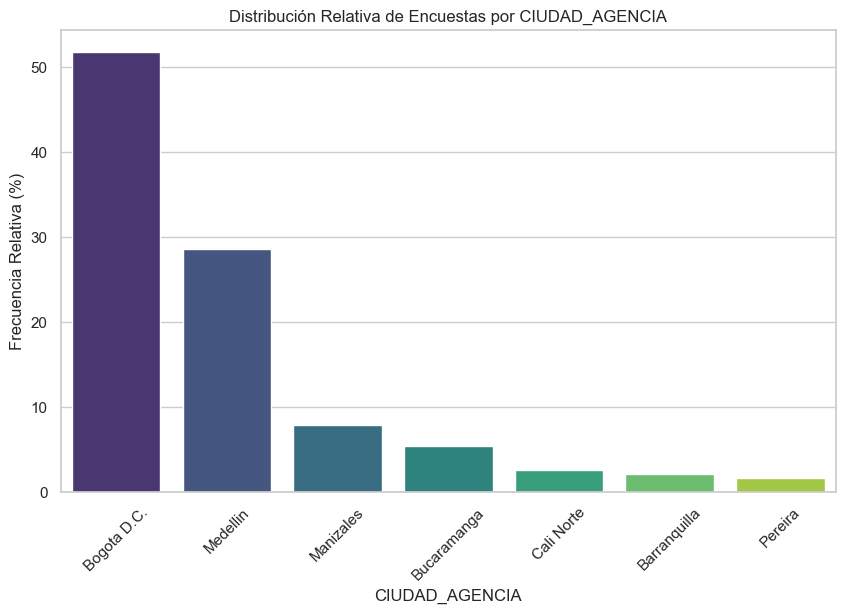

In [5]:
# Análisis univariado
abs_freq = df['CIUDAD_AGENCIA'].value_counts()
rel_freq = df['CIUDAD_AGENCIA'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Frec. Absoluta': abs_freq, 'Frec. Relativa (%)': rel_freq.round(2)}))
sns.barplot(x=rel_freq.index, y=rel_freq.values, palette="viridis")
plt.title('Distribución Relativa de Encuestas por CIUDAD_AGENCIA')
plt.ylabel('Frecuencia Relativa (%)')
plt.xticks(rotation=45)
plt.show()